In [ ]:
# Required modules intalled
#pip install Pitch
#pip install statsbombpy
#pip install imageio

In [ ]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import imageio

In [ ]:
#Find an appropriate match to analyse
#sb.matches(competition_id=43, season_id=106)

In [ ]:
#Match identificatoin - World Cup final 2022 and dataframe creation
Final_ID = 3869685
final_events_df = sb.events(match_id=Final_ID)
Final_360_df = pd.read_json(r'C:\Users\KevinPetrie\Documents\GitHub\open-data\data\three-sixty\Final.json')
df = pd.merge(left=final_events_df, right=Final_360_df, left_on='id', right_on='event_uuid', how ='left')

In [ ]:
#Analysing the data
df.columns

In [ ]:
# Identifying when the goals occured
goals_index = df[(df['shot_outcome']== 'Goal')]
goals_index['index']

4210     771
4212    1178
4219    2928
4220    2987
4232    4070
4234    4203
4237    4389
4238    4391
4240    4395
4242    4399
4243    4402
4244    4404
Name: index, dtype: int64

In [294]:
df.shot_outcome.unique()

array([nan, 'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [295]:
dfgoal = df[(df['shot_outcome']== 'Goal')]
df

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:19:07.472,Half End,NaN,NaN,NaN,NaN
4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,France,00:05:58.866,Half End,NaN,NaN,NaN,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:05:58.866,Half End,NaN,NaN,NaN,NaN
4405,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,France,00:49:35.193,Bad Behaviour,NaN,NaN,NaN,NaN


In [296]:
#Splitting the x and y coordinates from location array
dfgoal[['x_start', 'y_start']] = pd.DataFrame(dfgoal.location.tolist(), index=dfgoal.index)
dfgoal[['x_end','y_end','']] = pd.DataFrame(dfgoal.shot_end_location.tolist(), index=dfgoal.index)


C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\1549220584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgoal[['x_start', 'y_start']] = pd.DataFrame(dfgoal.location.tolist(), index=dfgoal.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\1549220584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgoal[['x_start', 'y_start']] = pd.DataFrame(dfgoal.location.tolist(), index=dfgoal.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\1549220584.py:2: SettingWithCopyWa

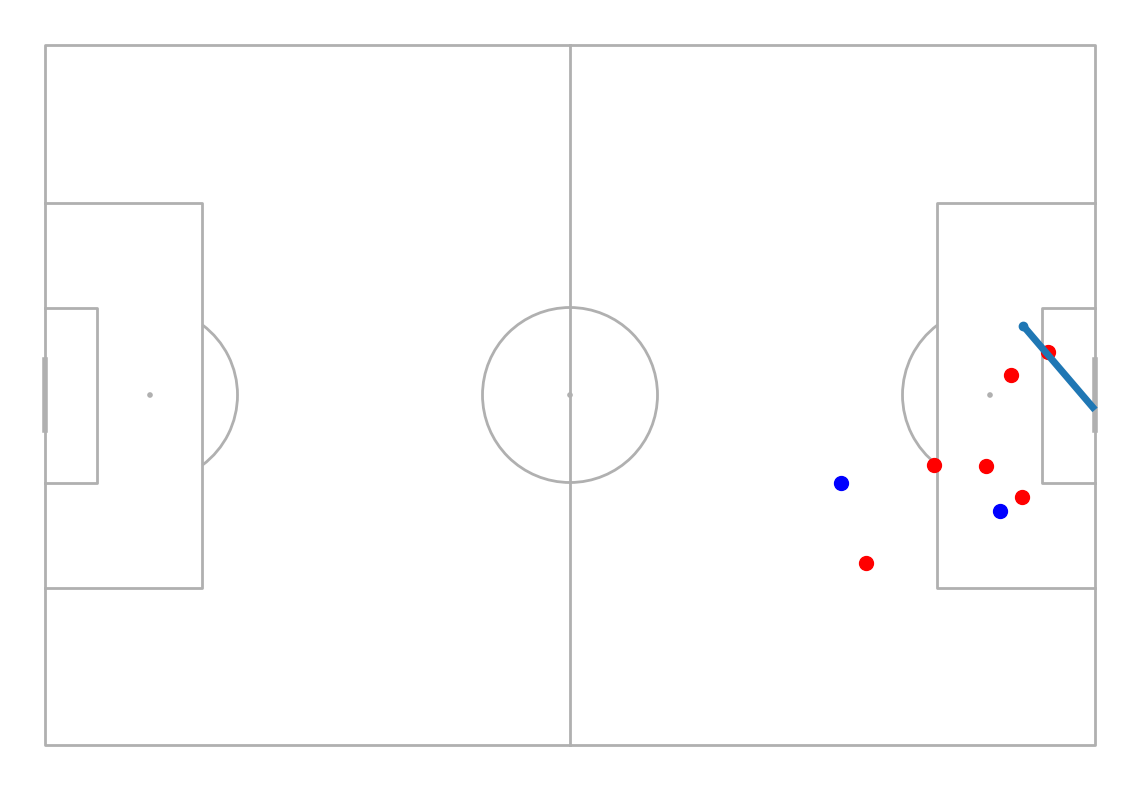

In [297]:
#Applying the players and pass/shot to a pitch
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))

dfgoal = dfgoal[1:2]


p.scatter(x=dfgoal['x_start'],y=dfgoal['y_start'], ax=ax)
p.lines(xstart=dfgoal['x_start'], ystart=dfgoal['y_start'], xend=dfgoal['x_end'], yend=dfgoal['y_end'], ax=ax)


for x in dfgoal.iloc[0]['shot_freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)

plt.savefig('1.png')

In [298]:
#The same process is repeated for the next event statsbomb has got a freeze frame for player locations. As a result of the data being messy there would be substational preprosing required
#for the code to be self-sustainable. As a result the code has been hard coded.
#The next 4 diagrams replicate the three blocks of code above.

dfA = df[(df['index']== 1174)]

dfA[['x_start', 'y_start']] = pd.DataFrame(dfA.location.tolist(), index=dfA.index)
dfA[['x_end','y_end']] = pd.DataFrame(dfA.pass_end_location.tolist(), index=dfA.index)   

C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2042140684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA[['x_start', 'y_start']] = pd.DataFrame(dfA.location.tolist(), index=dfA.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2042140684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA[['x_start', 'y_start']] = pd.DataFrame(dfA.location.tolist(), index=dfA.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2042140684.py:4: SettingWithCopyWarning: 
A value is

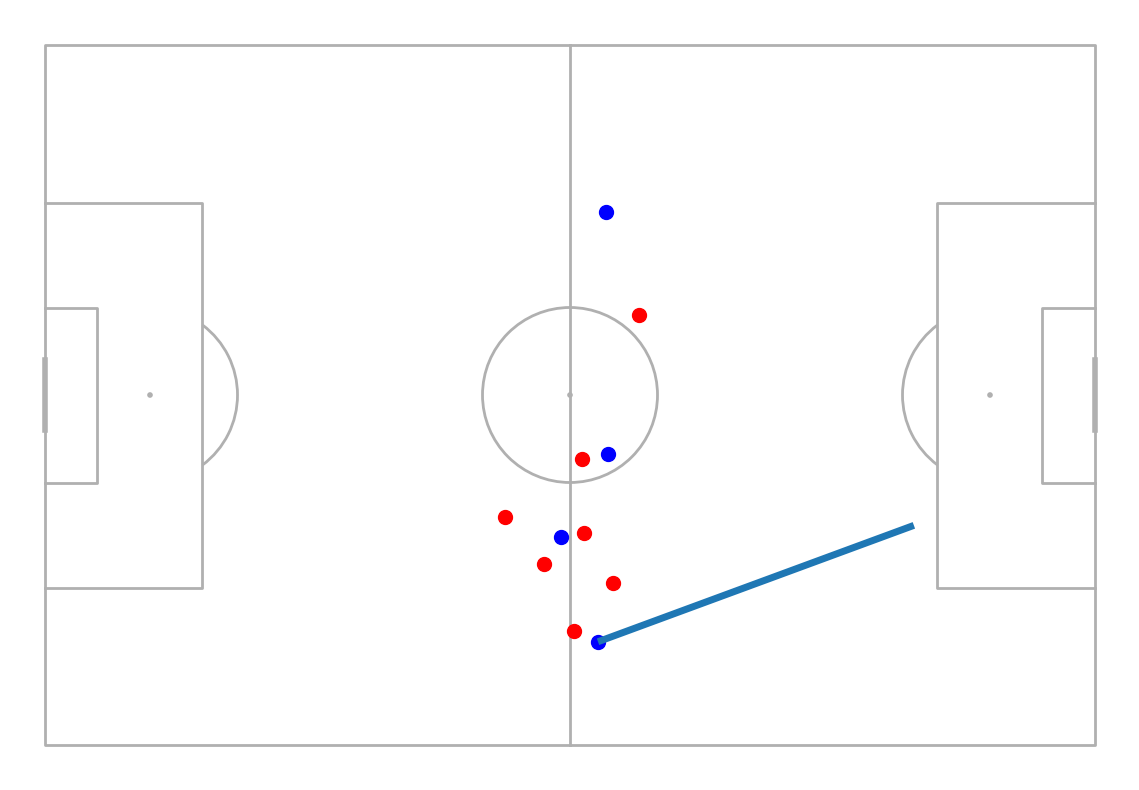

In [299]:

p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))

p.lines(xstart=df1['x_start'], ystart=df1['y_start'], xend=df1['x_end'], yend=df1['y_end'], ax=ax)


for x in dfA.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)

In [300]:
df1 = df[(df['index']== 1174)]

In [301]:

df1[['x_start', 'y_start']] = pd.DataFrame(df1.location.tolist(), index=df1.index)
df1[['x_end','y_end']] = pd.DataFrame(df1.pass_end_location.tolist(), index=df1.index)

C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2654725184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['x_start', 'y_start']] = pd.DataFrame(df1.location.tolist(), index=df1.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2654725184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['x_start', 'y_start']] = pd.DataFrame(df1.location.tolist(), index=df1.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\2654725184.py:2: SettingWithCopyWarning: 
A value is

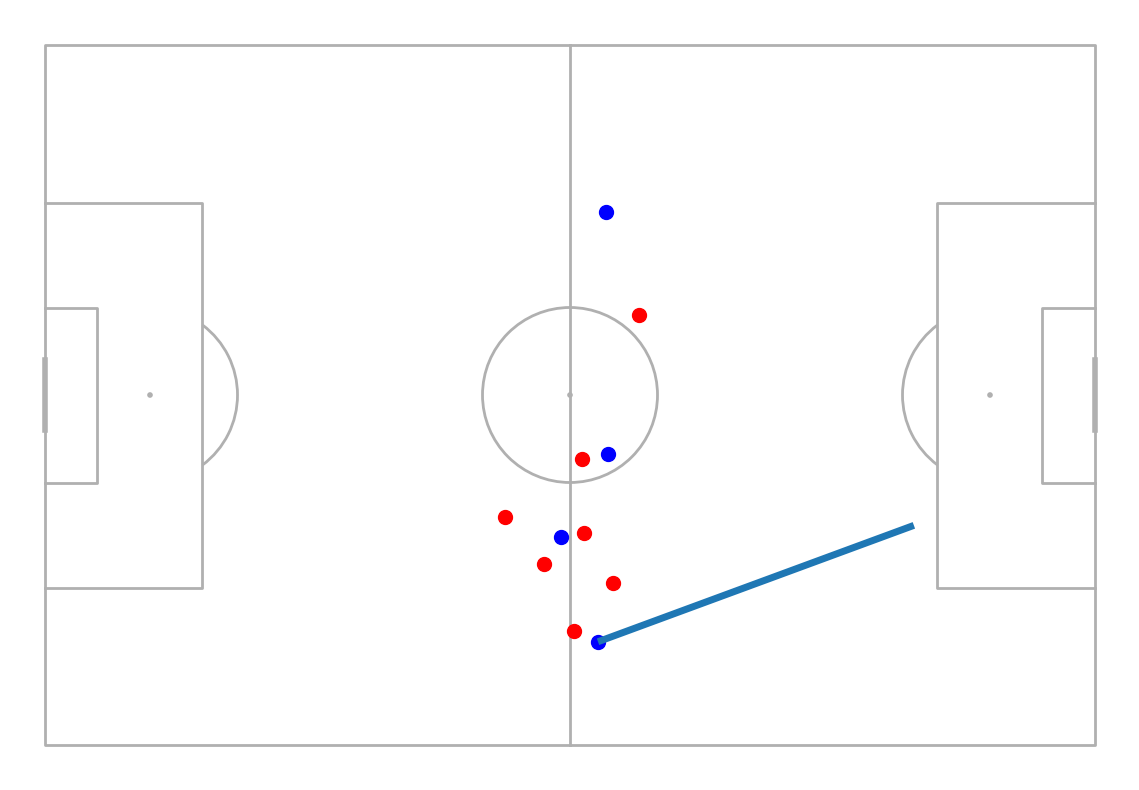

In [302]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))



p.scatter(x=df1['x_start'],y=df1['y_start'], ax=ax)
p.lines(xstart=df1['x_start'], ystart=df1['y_start'], xend=df1['x_end'], yend=df1['y_end'], ax=ax)


for x in df1.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)
    plt.savefig('2.png')

In [303]:
df2 = df[(df['index']== 1171)]

In [304]:

df2[['x_start', 'y_start']] = pd.DataFrame(df2.location.tolist(), index=df2.index)
df2[['x_end','y_end']] = pd.DataFrame(df2.pass_end_location.tolist(), index=df2.index)

C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\695897461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['x_start', 'y_start']] = pd.DataFrame(df2.location.tolist(), index=df2.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\695897461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['x_start', 'y_start']] = pd.DataFrame(df2.location.tolist(), index=df2.index)
C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\695897461.py:2: SettingWithCopyWarning: 
A value is tr

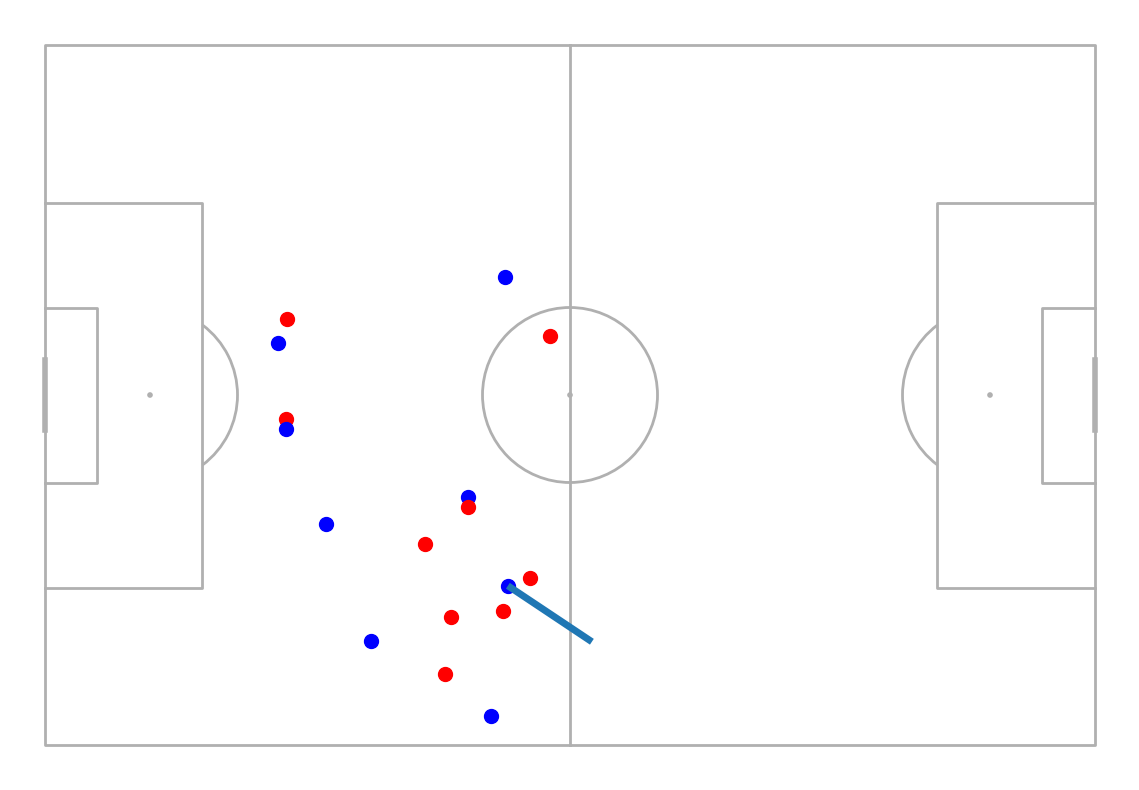

In [305]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))



p.scatter(x=df2['x_start'],y=df2['y_start'], ax=ax)
p.lines(xstart=df2['x_start'], ystart=df2['y_start'], xend=df2['x_end'], yend=df2['y_end'], ax=ax)


for x in df2.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)

    plt.savefig('3.png')

In [306]:
df3 = df[(df['index']== 1168)].reset_index(drop=True)

In [307]:
df3[['x_start', 'y_start']] = pd.DataFrame(df3.location.tolist(), index=df3.index)
df3[['x_end','y_end']] = pd.DataFrame(df3.pass_end_location.tolist(), index=df3.index)

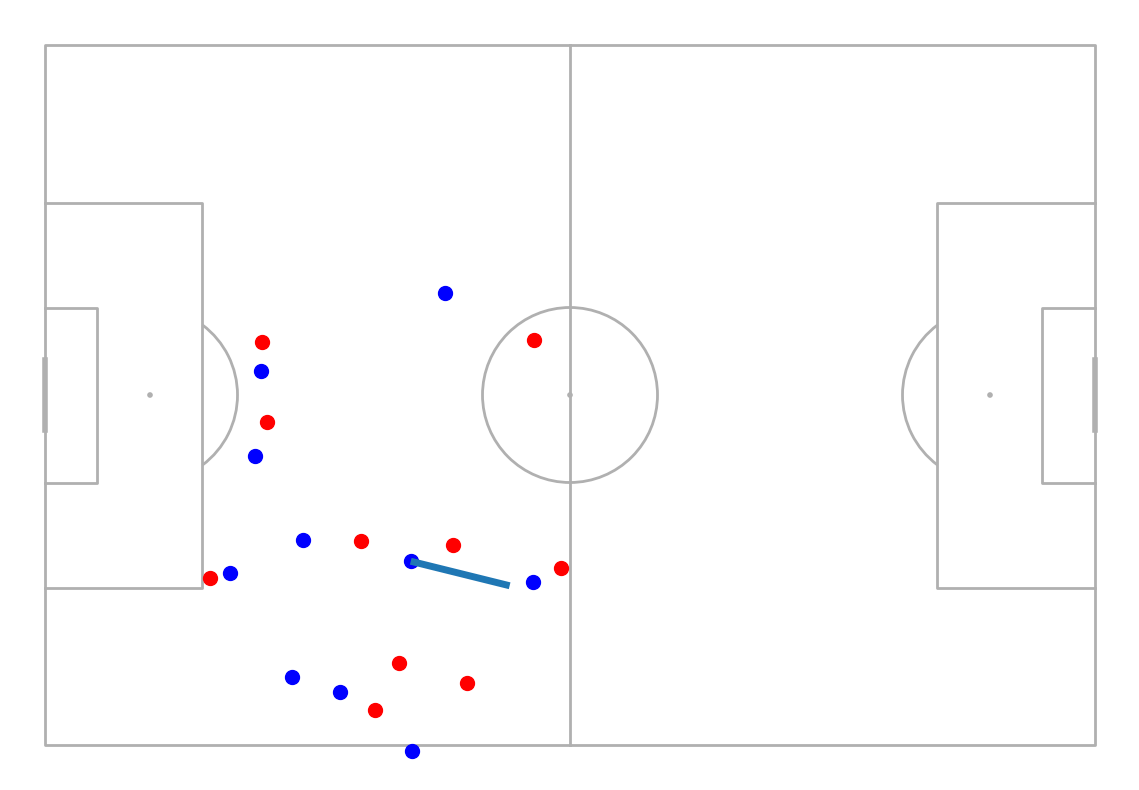

In [308]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))

p.scatter(x=df3['x_start'],y=df3['y_start'], ax=ax)
p.lines(xstart=df3['x_start'], ystart=df3['y_start'], xend=df3['x_end'], yend=df3['y_end'], ax=ax)


for x in df3.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)

plt.savefig('4.png')

In [327]:
df4 = df[(df['index']== 1166)].reset_index(drop=True)

In [328]:
df4[['x_start', 'y_start']] = pd.DataFrame(df4.location.tolist(), index=df4.index)
df4[['x_end','y_end']] = pd.DataFrame(df4.pass_end_location.tolist(), index=df4.index)

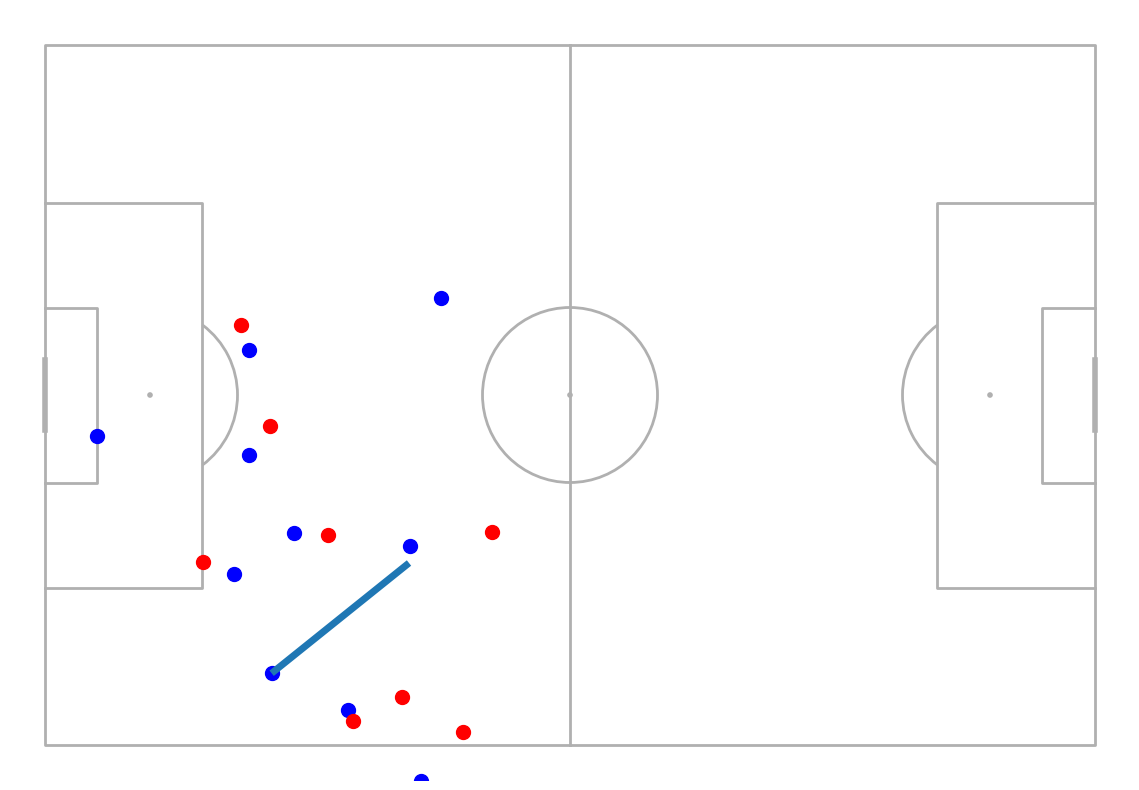

In [329]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(12,8))

p.scatter(x=df4['x_start'],y=df4['y_start'], ax=ax)
p.lines(xstart=df4['x_start'], ystart=df4['y_start'], xend=df4['x_end'], yend=df4['y_end'], ax=ax)


for x in df4.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'

    p.scatter(x=x['location'][0], y=x['location'][1],ax=ax, c=color, s=100)

    plt.savefig('5.png')

In [313]:
# Create GIF and save to desktop
# If all players were available for all events this could be placed into a team presentation. 
with imageio.get_writer('2nd Goal.gif', mode='I', duration= 0.7) as writer:
    for filename in ['5.png', '4.png', '3.png', '2.png', '1.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

C:\Users\KevinPetrie\AppData\Local\Temp\ipykernel_13280\3128502532.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
